# Classification Mid-term Project: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

## 0. Load libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

## 1. Load the dataset

In [95]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

In [96]:
dataset.head(5)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2. Data preprocessing 

In [97]:
# delete code
dataset.drop('Code', axis=1, inplace=True)
# mark ? as NaN
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', np.NaN)
# Convert the type of 'Bare-Nuclei' column as float
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].astype(float)
# Drop NaN
dataset.dropna(axis=0, how='any', inplace=True)

In [98]:
dataset.head(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


## 3. Data summarization

In [99]:
# shape
print(dataset.shape)

(683, 10)


In [100]:
# types
print(dataset.dtypes)

Clump-Thickness       int64
Cell-Size             int64
Cell-Shape            int64
Adhesion              int64
Single-Cell-Size      int64
Bare-Nuclei         float64
Chromatin             int64
Nucleoli              int64
Mitoses               int64
Class                 int64
dtype: object


In [101]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
pd.set_option('display.width', 200)
print(dataset.describe())

       Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses    Class
count          683.000    683.000     683.000   683.000           683.000      683.000    683.000   683.000  683.000  683.000
mean             4.442      3.151       3.215     2.830             3.234        3.545      3.445     2.870    1.603    2.700
std              2.821      3.065       2.989     2.865             2.223        3.644      2.450     3.053    1.733    0.955
min              1.000      1.000       1.000     1.000             1.000        1.000      1.000     1.000    1.000    2.000
25%              2.000      1.000       1.000     1.000             2.000        1.000      2.000     1.000    1.000    2.000
50%              4.000      1.000       1.000     1.000             2.000        1.000      3.000     1.000    1.000    2.000
75%              6.000      5.000       5.000     4.000             4.000        6.000      5.000     4.000    1.000  

In [102]:
# class distribution
print(dataset.groupby('Class').size())

Class
2    444
4    239
dtype: int64


In [103]:
# correlation
print(dataset.corr(method='pearson'))

                  Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses  Class
Clump-Thickness             1.000      0.642       0.653     0.488             0.524        0.593      0.554     0.534    0.351  0.715
Cell-Size                   0.642      1.000       0.907     0.707             0.754        0.692      0.756     0.719    0.461  0.821
Cell-Shape                  0.653      0.907       1.000     0.686             0.722        0.714      0.735     0.718    0.441  0.822
Adhesion                    0.488      0.707       0.686     1.000             0.595        0.671      0.669     0.603    0.419  0.706
Single-Cell-Size            0.524      0.754       0.722     0.595             1.000        0.586      0.618     0.629    0.481  0.691
Bare-Nuclei                 0.593      0.692       0.714     0.671             0.586        1.000      0.681     0.584    0.339  0.823
Chromatin                   0.554      0.756       0.73

## 4. Data visualization

In [104]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (15,15)

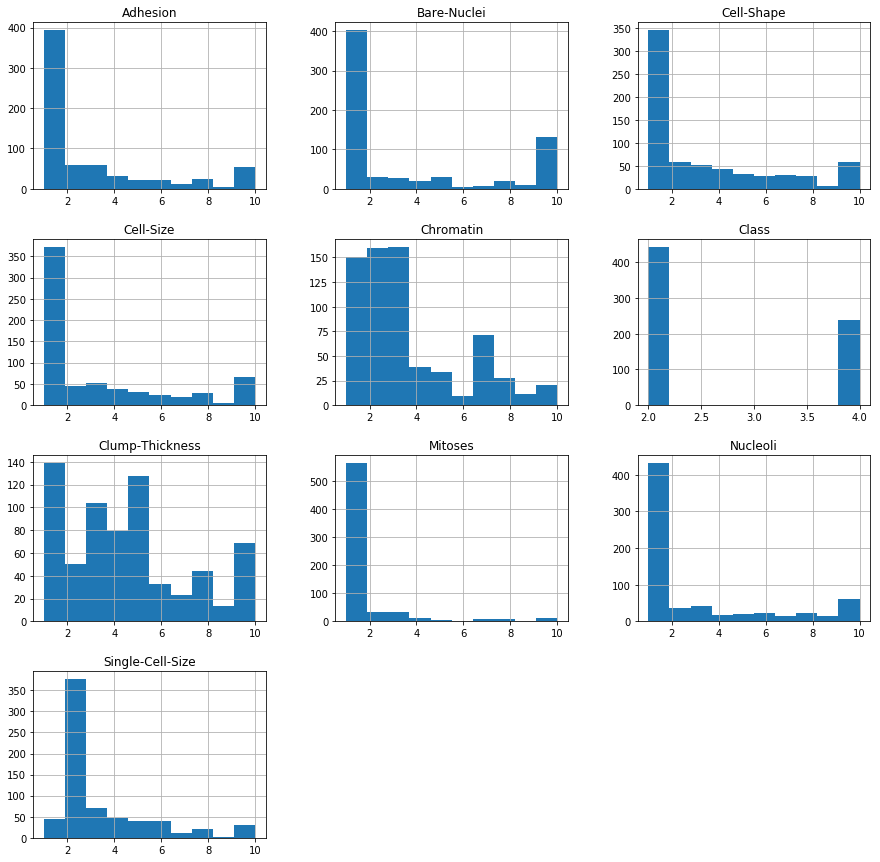

In [105]:
# histograms
dataset.hist()
plt.show()

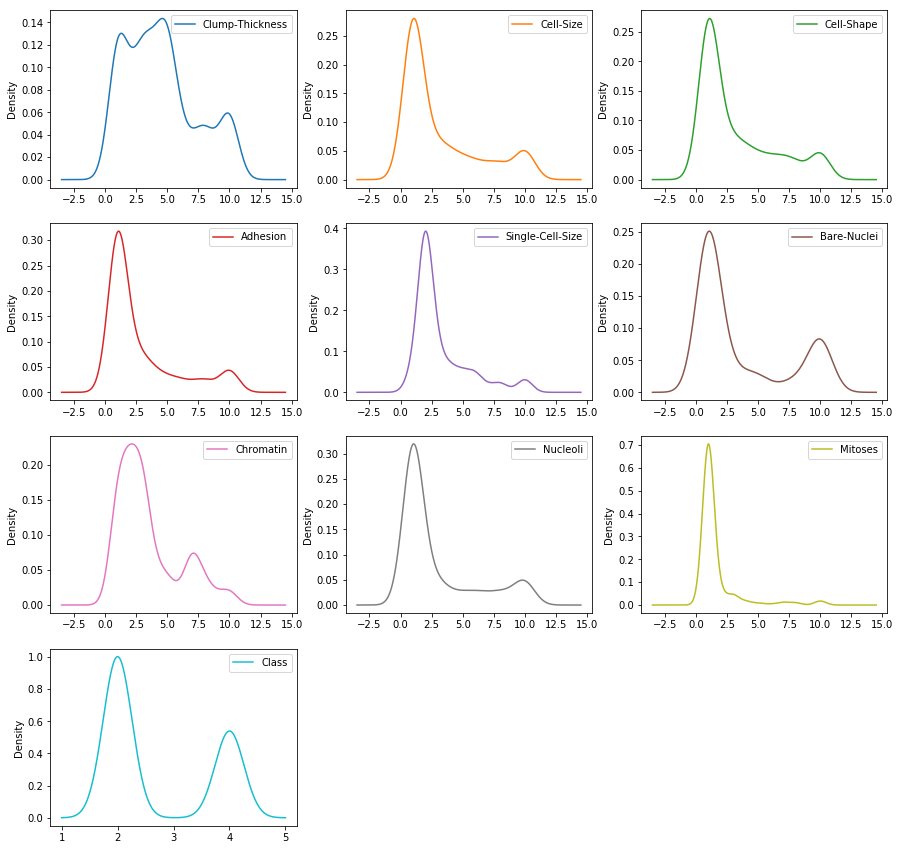

In [106]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

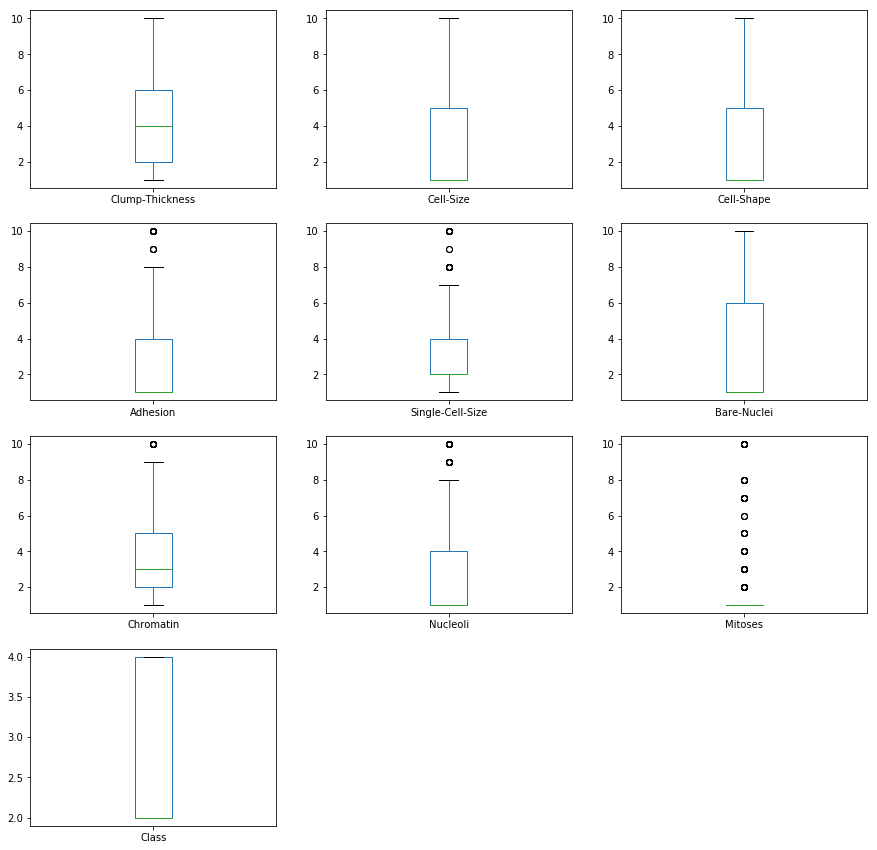

In [107]:
# box plots
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

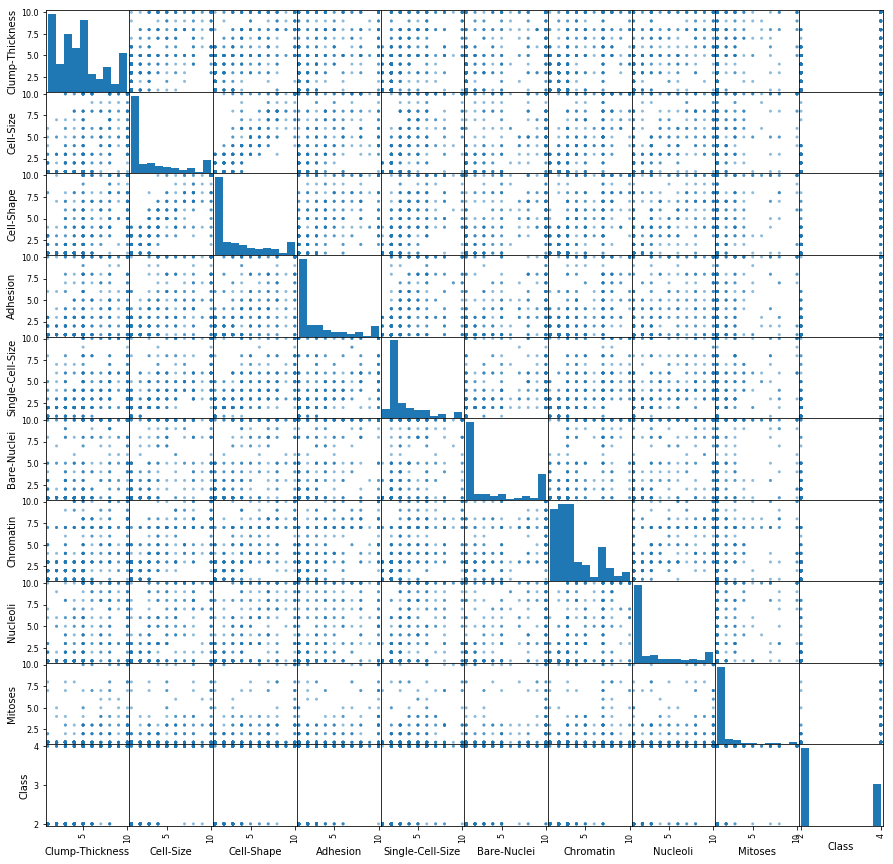

In [108]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

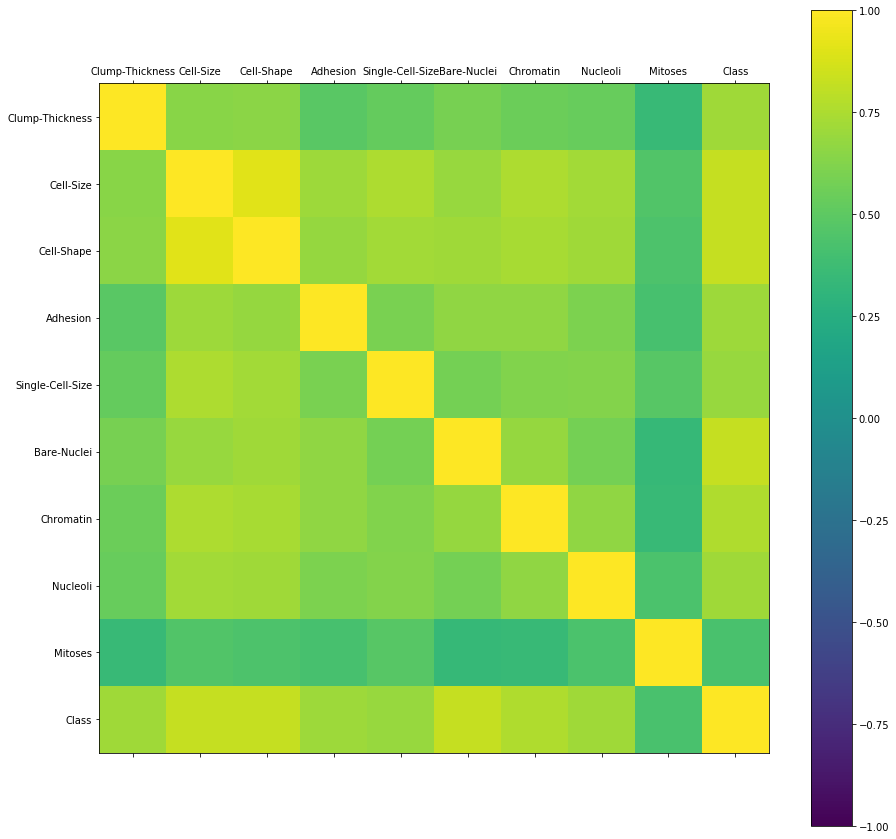

In [109]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

## 5.  Preparation

In [110]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [111]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

## 6. Learn models

In [112]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [113]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [114]:
results = []
names = []
for name, model in models:
    
    kf = KFold(n_splits=num_folds, random_state=seed) #n=num_instances, 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

LR: 0.965219 (0.019105)
LDA: 0.963367 (0.018253)
KNN: 0.967071 (0.026935)
CART: 0.939529 (0.011855)
NB: 0.970741 (0.012114)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.967104 (0.022819)
[array([0.98181818, 0.96363636, 0.96363636, 0.98181818, 0.92727273,
       0.96363636, 0.96296296, 1.        , 0.96296296, 0.94444444]), array([0.96363636, 0.96363636, 0.96363636, 1.        , 0.92727273,
       0.96363636, 0.96296296, 0.98148148, 0.96296296, 0.94444444]), array([1.        , 0.96363636, 0.94545455, 0.98181818, 0.92727273,
       0.96363636, 1.        , 1.        , 0.96296296, 0.92592593]), array([0.96363636, 0.94545455, 0.94545455, 0.94545455, 0.92727273,
       0.92727273, 0.94444444, 0.94444444, 0.92592593, 0.92592593]), array([0.98181818, 0.96363636, 0.96363636, 0.96363636, 0.96363636,
       0.96363636, 1.        , 0.98148148, 0.96296296, 0.96296296]), array([0.98181818, 0.96363636, 0.94545455, 0.98181818, 0.92727273,
       0.96363636, 1.        , 1.        , 0.96296296, 0.94444444])]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


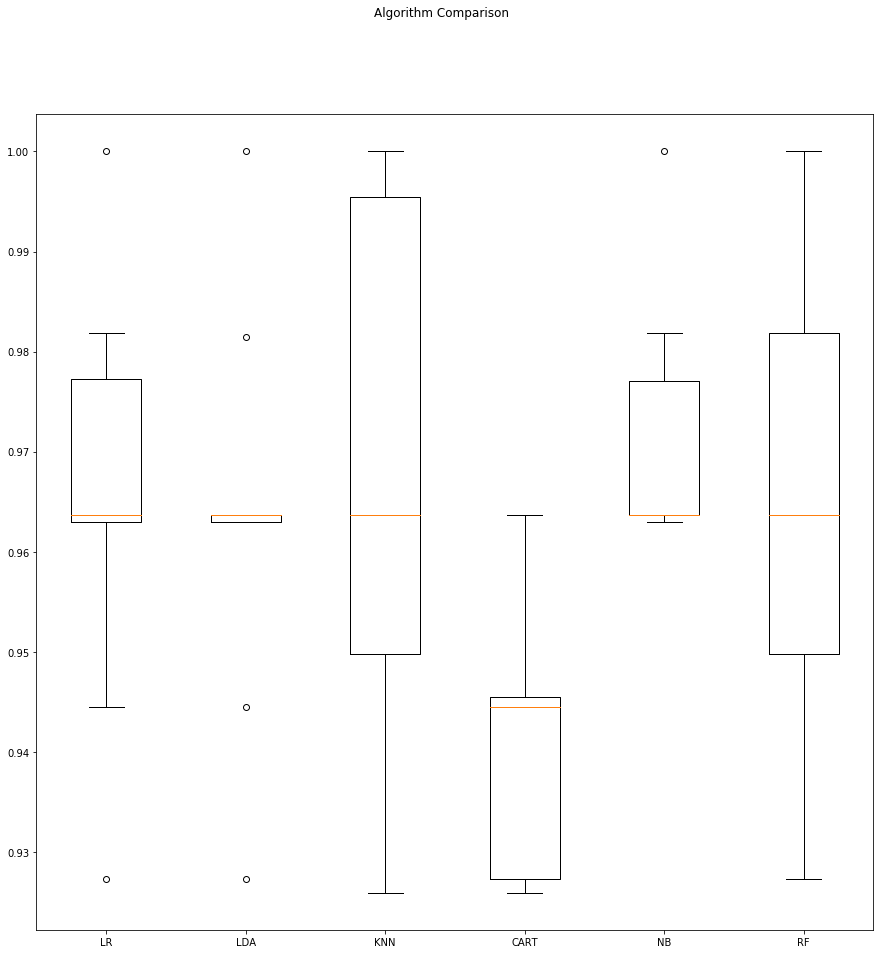

In [115]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [116]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [117]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledLDA', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART', Pi

In [118]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

ScaledLR: 0.967071 (0.017858)
ScaledLDA: 0.963367 (0.018253)
ScaledKNN: 0.968923 (0.024576)
ScaledCART: 0.943232 (0.020859)
ScaledNB: 0.970741 (0.012114)
ScaledRF: 0.959764 (0.019573)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

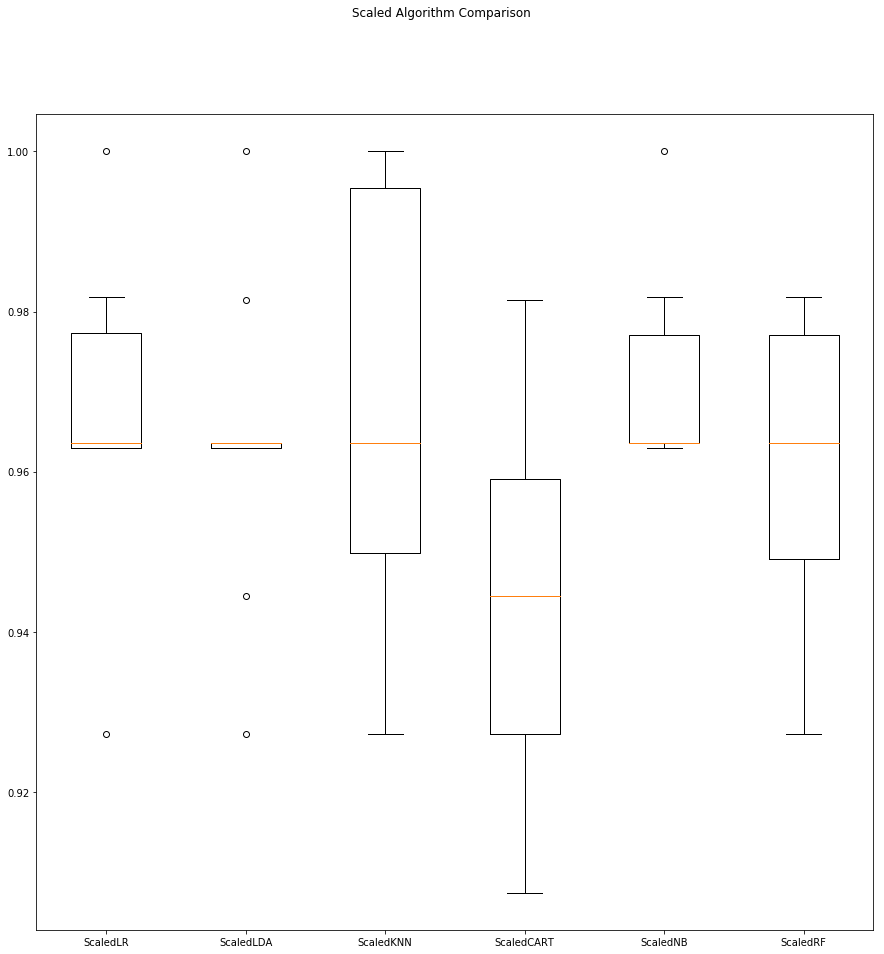

In [119]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [120]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold( n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

ScaledLR: 0.968889 (0.020057)
ScaledLDA: 0.963367 (0.018253)
ScaledKNN: 0.967071 (0.026935)
ScaledCART: 0.937778 (0.021802)
ScaledNB: 0.970741 (0.012114)
ScaledRF: 0.970673 (0.018802)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

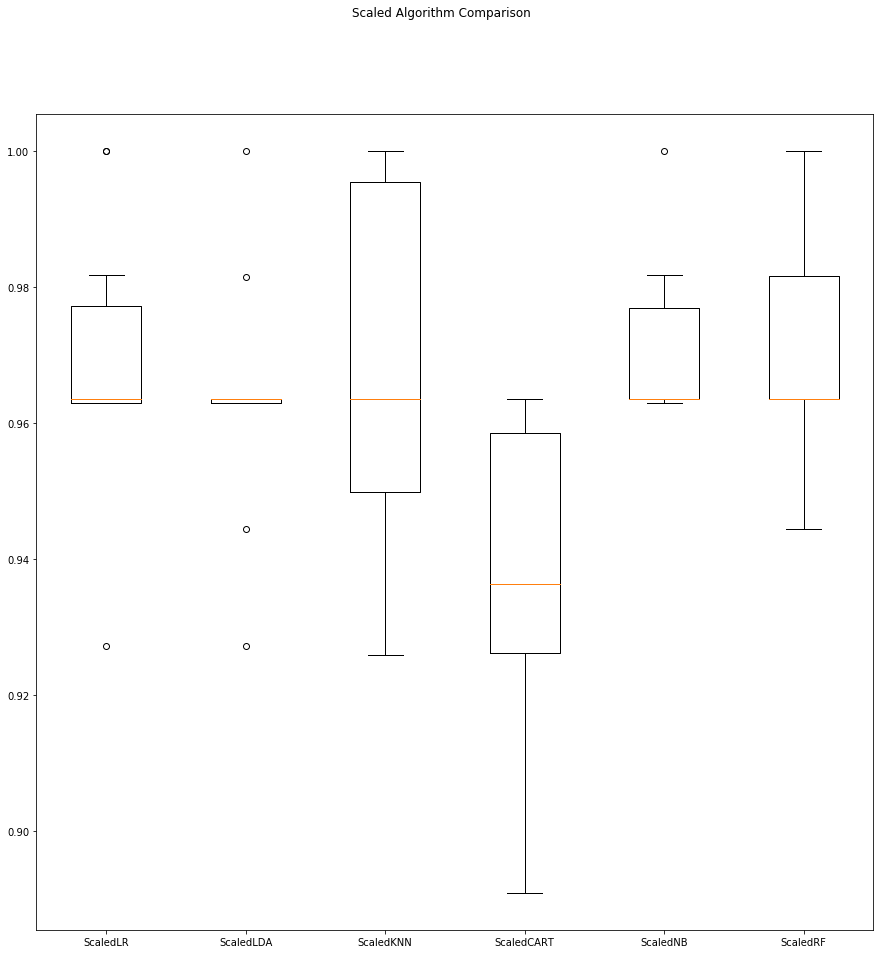

In [121]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [130]:
# Tune scaled-KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kf = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kf)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.972527 using {'n_neighbors': 11}



- GridSearchCV를 이용하여 RandomForestClassifier의 성능향사


In [129]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 0.972527 using {'max_features': 'sqrt', 'n_estimators': 25}


In [132]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.972527 using {'max_features': 'sqrt', 'n_estimators': 40}


In [133]:
best_RF = RandomForestClassifier(max_features='sqrt', n_estimators=20)
best_RF.fit(X_train, Y_train)
best_RF.feature_importances_

array([0.02609893, 0.33629133, 0.18696884, 0.02019523, 0.09720421,
       0.16226186, 0.10113879, 0.0623391 , 0.00750171])

In [134]:
dataset.columns[0:-1]

Index(['Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses'], dtype='object')

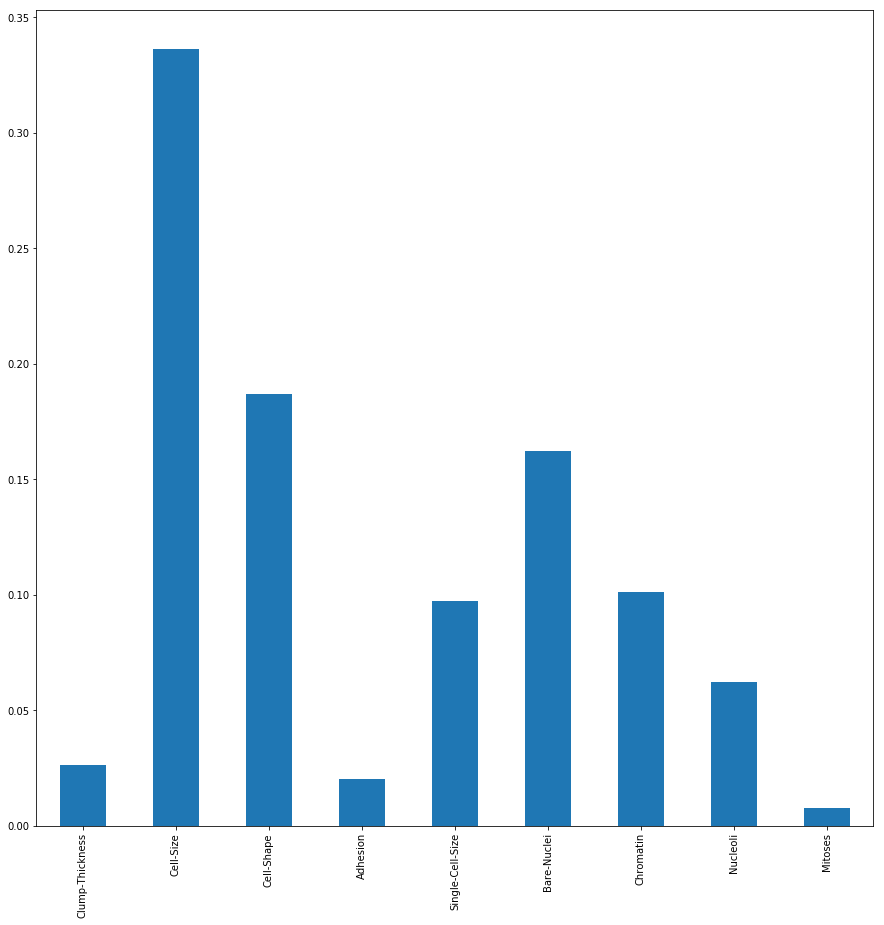

In [135]:
importances = pd.Series(best_RF.feature_importances_, index = dataset.columns[0:-1])
importances.plot(kind='bar')

- Test set을 cross-validation


In [136]:
final_pipelines = []
final_pipelines.append(('Tuned_KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors = 11))])))
final_pipelines.append(('Tuned_RF', Pipeline([('RF', RandomForestClassifier(max_features = 'sqrt', n_estimators = 20))])))

In [137]:
final_pipelines

[('Tuned_KNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=11, p=2,
             weights='uniform'))])), ('Tuned_RF', Pipeline(memory=None,
       steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]))]

In [143]:
cm = []
accuracy = []
names = []
for name, model in final_pipelines:
    model.fit(X_train, Y_train)
    Y_test_hat = model.predict(X_test)
    cm.append(confusion_matrix(Y_test, Y_test_hat))
    accuracy.append(accuracy_score(Y_test, Y_test_hat))
    names.append(name)

In [144]:
names

['Tuned_KNN', 'Tuned_RF']

In [145]:
cm

[array([[78,  3],
        [ 2, 54]], dtype=int64), array([[78,  3],
        [ 2, 54]], dtype=int64)]

In [146]:
accuracy

[0.9635036496350365, 0.9635036496350365]